In [129]:
import pandas as pd

covid_data = pd.read_csv('data/covid_data.csv', sep=',')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv', sep=',')

covid_data  #данные о показателях заболеваемости за каждый день в различных регионах 187 стран.



        # date — дата наблюдения;
        # province/state — наименование провинции/штата;
        # country — наименование страны;
        # confirmed — общее число зафиксированных случаев на указанный день;
        # deaths — общее число зафиксированных смертей на указанный день;
        # recovered — общее число выздоровлений на указанный день.
        
vaccinations_data = vaccinations_data[['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]   #данные о процессе вакцинирования людей в 221 стране мира. 
#vaccinations_data
# Данная таблица содержит следующие столбцы:

#         country — наименование страны;
#         date — дата наблюдения;
#         total_vaccinations — общее число введённых вакцин в стране на указанный день;
#         people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
#         people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день 
#                                         (рассчитывается как people_vaccinated/population*100 );
#         people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
#         people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день 
#                                               (рассчитывается как people_fully_vaccinated/popylation*100);
#         daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
#         vaccines — комбинации вакцин, используемые в стране.
display(covid_data.head())
display(vaccinations_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [130]:
# Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам.
# Тем самым переходим от данных по регионам к данным по странам:
covid_data = covid_data.groupby(['date', 'country'], as_index=False)[['confirmed','deaths', 'recovered']].sum()
covid_data

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0
...,...,...,...,...,...
86780,12/31/2020,Vietnam,1465.0,35.0,1325.0
86781,12/31/2020,West Bank and Gaza,138004.0,1400.0,117183.0
86782,12/31/2020,Yemen,2099.0,610.0,1394.0
86783,12/31/2020,Zambia,20725.0,388.0,18660.0


In [131]:
#Преобразуем даты в формат datetime с помощью функции pd.to_datetime():
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [132]:
# Создаем признак больных на данный момент(active). 
# Для этого вычитаем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов 
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data


,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0
...,...,...,...,...,...,...
86780,2020-12-31,Vietnam,1465.0,35.0,1325.0,105.0
86781,2020-12-31,West Bank and Gaza,138004.0,1400.0,117183.0,19421.0
86782,2020-12-31,Yemen,2099.0,610.0,1394.0,95.0
86783,2020-12-31,Zambia,20725.0,388.0,18660.0,1677.0


In [133]:
# Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей.
# Для этого отсортируем данные по названиям стран, а затем по датам.
# После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():
covid_data= covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
covid_data

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
#В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
vaccinations_data

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [135]:
#За какой период представлены данные в таблице covid_data? 
#Подсказка (1 из 1): Для определения периода можно найти максимум и минимум в столбце date таблицы covid_data.
print(covid_data['date'].min(), covid_data['date'].max())
print(vaccinations_data['date'].min(), vaccinations_data['date'].max())


2020-01-22 00:00:00 2021-05-29 00:00:00
2020-12-02 00:00:00 2021-09-06 00:00:00


In [136]:
# С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
# Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1.
# То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более.
# Результат объединения занесите в переменную covid_df.
# Подсказка (1 из 1): Для объединения по нескольким столбцам передайте в параметр метода merge() список с именами ключей.
covid_df = covid_data.merge(vaccinations_data, on= ['date', 'country'], how='left')
covid_df


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
# В получившейся  covid_df создайте признаки death_rate — 
# общий процент смертей среди зафиксированных случаев (летальность) и recover_rate —
# общий процент случаев выздоровления.
# Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered)
# к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.
covid_df['death_rate'] = (covid_df['deaths'] / covid_df['confirmed']) * 100
covid_df['recovered_rate'] = (covid_df['recovered'] / covid_df['confirmed']) * 100
print(round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2))


7.19


In [138]:
#Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.
round(covid_df[covid_df['country'] == 'Russia']['recovered_rate'].mean(), 2)

67.06

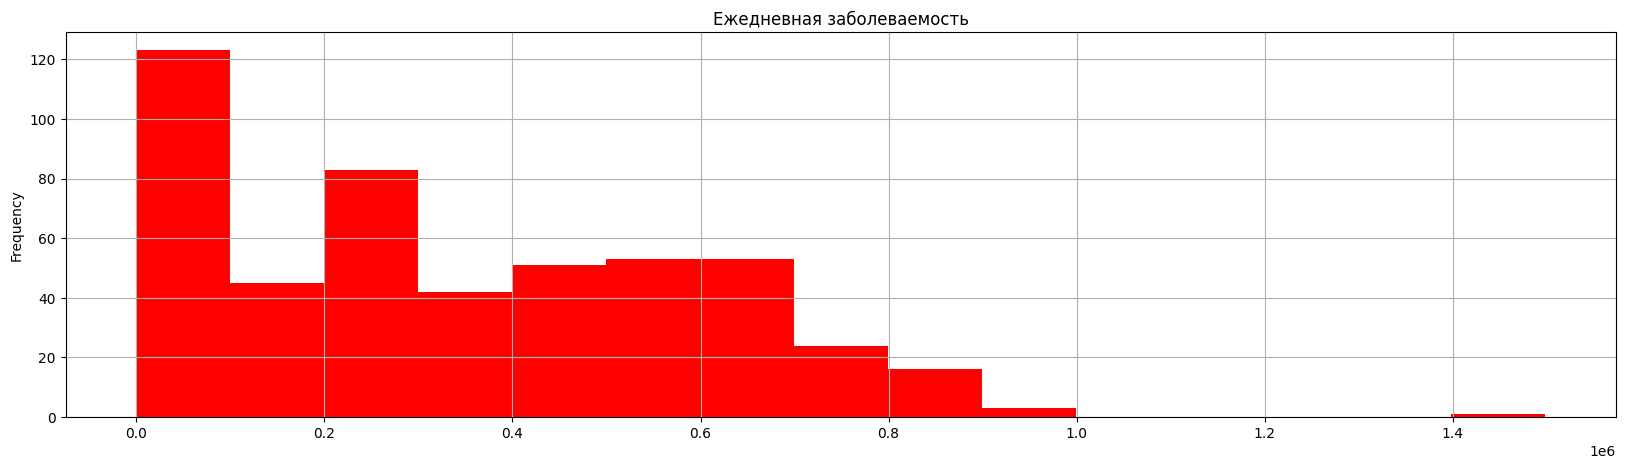

In [139]:
# Начнём с исследования заболеваемости коронавирусом во всём мире.
# Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени.
# Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='hist',
    figsize=(20,5),
    title='Ежедневная заболеваемость',
    grid=True,
    bins=15,
    color='red'
    
    
);


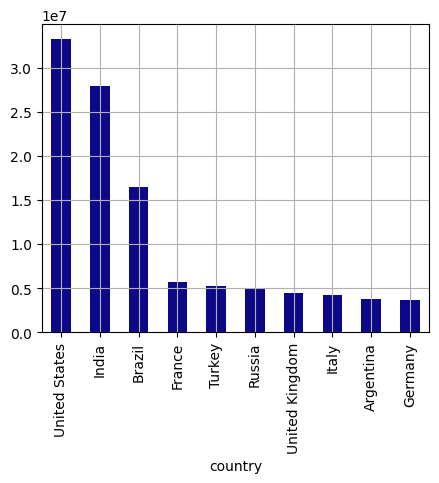

In [140]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country= grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(5,4),
    colormap='plasma'
);

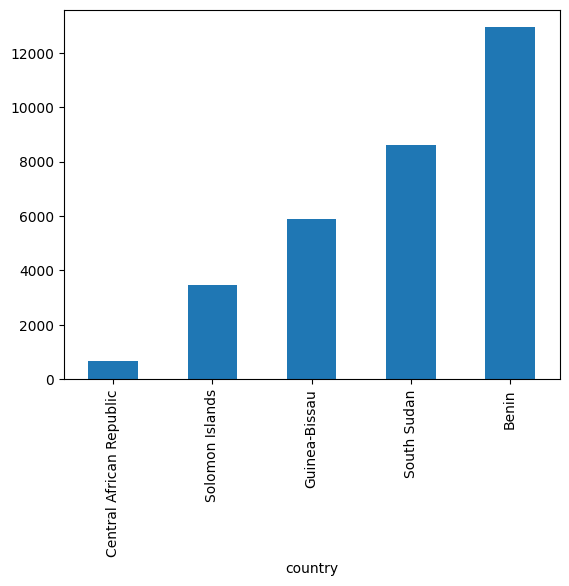

In [141]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

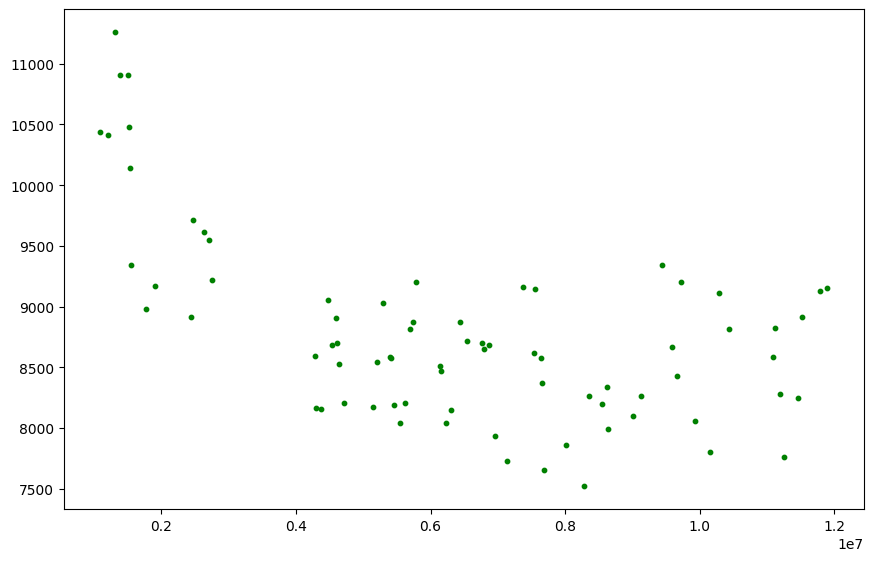

In [142]:
import matplotlib.pyplot as ptl
#ptl.style.use('default')
#fig = ptl.figure(figsize=(5, 5))
#axes = fig.add_axes([0,0,1,1])
us_data = covid_df[covid_df['country'] == 'Russia']

fig = ptl.figure(figsize=(8,5))
axes = fig.add_axes([0,0,1,1])
axes.scatter(
    x= us_data['people_fully_vaccinated'],
    y= us_data['daily_confirmed'],
    s=10,
    marker='o',
    c='green'
    
);

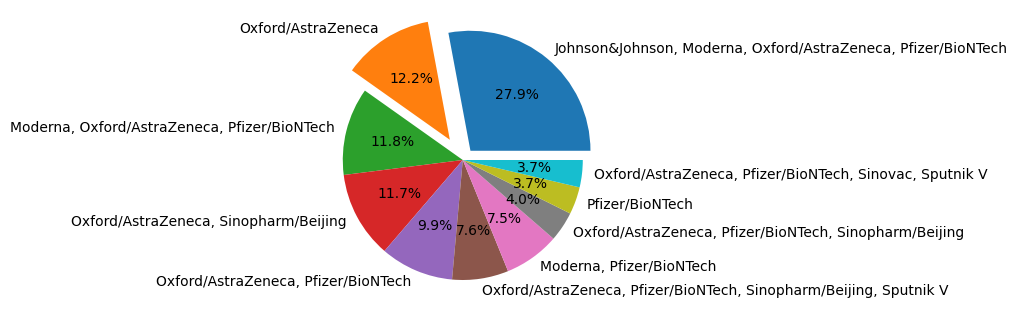

In [143]:
# ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts().
# Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы.
# Будем отображать доли в процентах и округлять их до одного знака после запятой.
# Самую распространённую вакцину сместим на 10 % от центра:

vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = ptl.figure(figsize=(3,3))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode=[0.1,0.2,0,0,0,0,0,0,0,0]
);

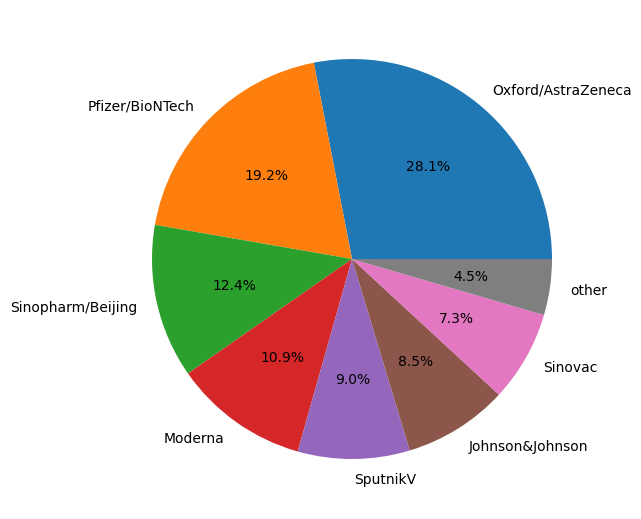

In [144]:
#Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности и посчитать, в скольких странах она используется.
import matplotlib.pyplot as plt

#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

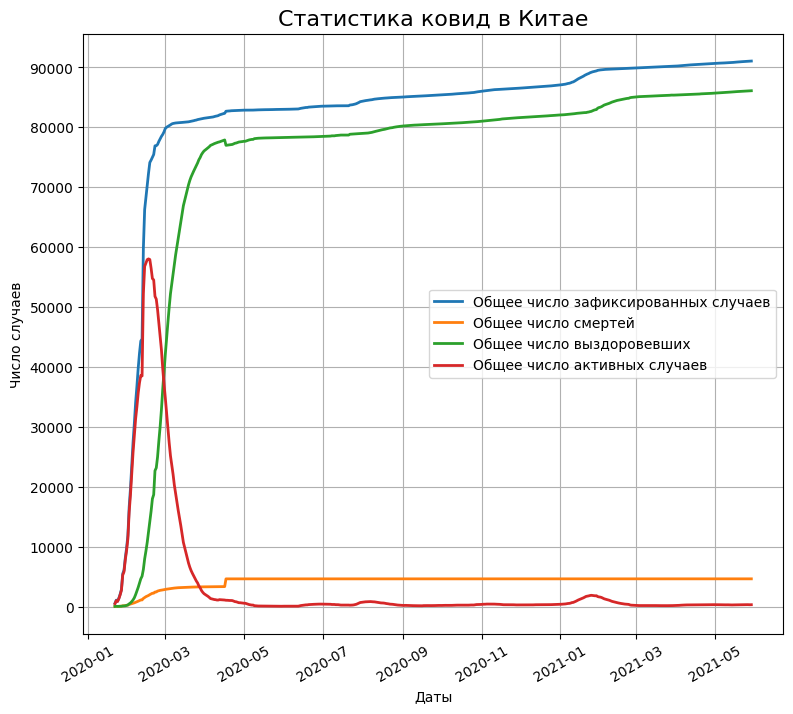

In [145]:
# изобразим на одном графике, как росла общая заболеваемость (confirmed),
# число зафиксированных смертей (deaths),
# выздоровевших пациентов (recovered) и активных случаев (active) в Китае.
# Дополнительно в параметрах метода указываем параметр label — название графика, 
# которое будет отображаться на легенде, а также lw — ширину линии графика. 
# Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, 
# повернём метки по оси x на 30 градусов, 
# а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):

china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active','deaths', 'recovered']].sum()
fig = ptl.figure(figsize=(7,6))
axes = fig.add_axes([0,0,1,1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=2)
axes.plot(china_grouped['deaths'], label= 'Общее число смертей', lw=2)
axes.plot(china_grouped['recovered'], label= 'Общее число выздоровевших', lw=2)
axes.plot(china_grouped['active'], label= 'Общее число активных случаев', lw=2)

axes.set_title('Статистика ковид в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();




# На графике наблюдается резкий рост заболеваемости на начальном периоде до середины февраля 2020 года,
# после чего видно резкое падение числа активных случаев 
# (примерно в этот период власти Китая ввели тотальный локдаун и прекратили транспортное сообщение со всем миром). 
# Далее число активных случаев только падает, а темп прироста числа заболевших снижается. 
# При этом общее число смертей в Китае остаётся практически на одном уровне (около 5 тысяч), 
# уже начиная с мая 2020 года (новые пациенты умирают крайне редко).

# Стоит обратить внимание на выделенные чёрным маркером сдвиги в графиках. 
# Они являются свидетельством противоречия в данных: общее число выздоровевших пациентов почему-то резко упало,
# а число умерших возросло. Почему так произошло? 
# Произошёл пересчёт числа заболевших? Данные были утеряны или искажены? 
# Если вы в своей практике столкнётесь с такими же противоречиями, 
# вам необходимо будет обратиться к первоисточнику, чтобы выяснить причину.




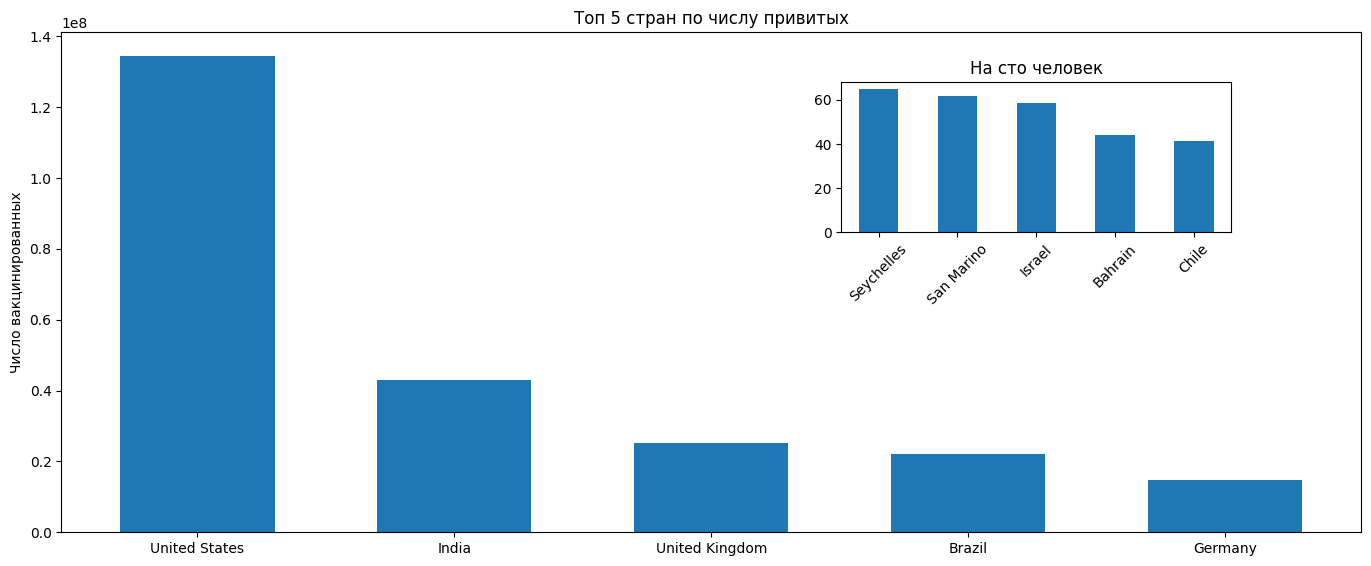

In [146]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hunderd = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

fig = ptl.figure(figsize=(13, 5))
main_axes = fig.add_axes([0,0,1,1])
main_axes.bar(x = vacc_country.index, height=vacc_country, width=0.6);
main_axes.set_ylabel('Число вакцинированных')
main_axes.set_title('Топ 5 стран по числу привитых')

insert_axes = fig.add_axes([0.6,0.6,0.3,0.3])
insert_axes.bar(x = vacc_country_per_hunderd.index, height=vacc_country_per_hunderd, width=0.5)
insert_axes.set_title('На сто человек')
insert_axes.xaxis.set_tick_params(rotation = 45)



# Нетрудно заметить, что два представленных рейтинга отличаются: лидером по числу полностью привитых является США, а вот по числу вакцин на 100 человек населения — Сейшелы. В первый список попали страны с большим количеством населения, которое они активно прививают. Во второй список попали маленькие страны, которые проще всего обеспечить вакциной.

# В наш ТОП не попали страны, которые пользуются однокомпонентной вакциной, например Китай.


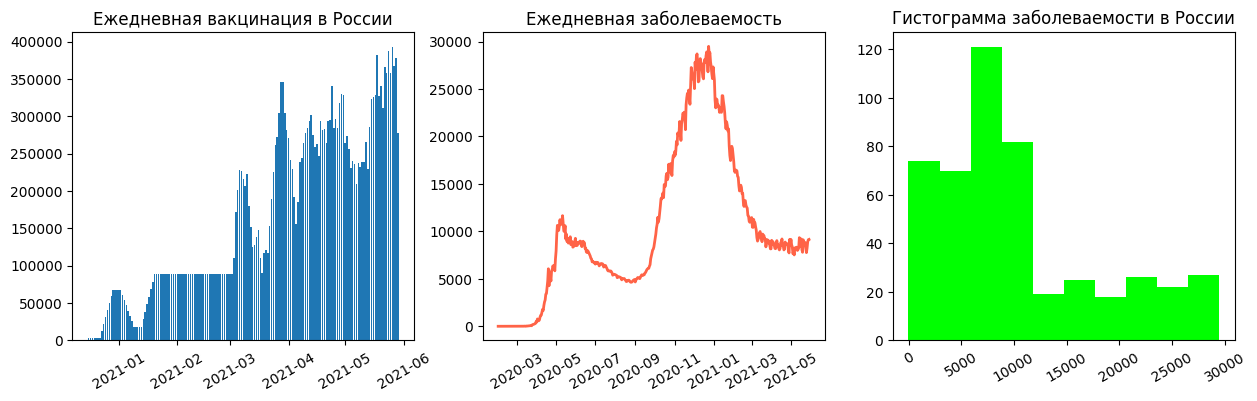

In [147]:
russia_data  = covid_df[covid_df['country'] == 'Russia']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

axes[0].bar(x = russia_data['date'], height= russia_data['daily_vaccinations'], label ='Число вакцинированных')
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=30)

axes[1].plot(russia_data['date'], russia_data['daily_confirmed'], label='Число заболевших', color= 'tomato', lw=2 )
axes[1].set_title('Ежедневная заболеваемость')
axes[1].xaxis.set_tick_params(rotation=30)

axes[2].hist(x= russia_data['daily_confirmed'], label = 'Число заболевших', color='lime', bins=10)
axes[2].set_title('Гистограмма заболеваемости в России')
axes[2].xaxis.set_tick_params(rotation=30)

        # На первом графике можно наблюдать колеблющийся рост числа ежедневно вакцинированных людей.
        # Особенно в глаза бросается «пенёк» в период с конца января до начала марта 2021 года. 
        # Это период, когда данные о процессе вакцинации людей не обновлялись.

        # На втором графике мы видим две волны коронавируса в России.
        # Первая — в середине марта 2020 года, которая достигла максимума в 13 тысяч заболевших за сутки. 
        # Вторая волна, судя по графику, началась в октябре 2020 года и достигла своего пика почти в 30 тысяч заболевших за сутки в конце декабря этого же года 
        # (точные данные: 24 декабря было зафиксировано рекордное число подтверждённых случаев: 29935).

        # Далее с ростом показателей вакцинации и введением новых карантинных мер заболеваемость снова постепенно снижается.

        # На третьем графике можно увидеть,
        # что большая часть наблюдений ежедневной заболеваемости находится в интервале от 5 до до 10 тысяч человек в день. 
        # Ещё один пик гистограммы находится около 0 — это случаи, зафиксированные на начальных этапах эпидемии 
        # (в Россию Covid-19 пришёл позже, чем во многие другие страны).




In [148]:
import seaborn as sns
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recovered_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


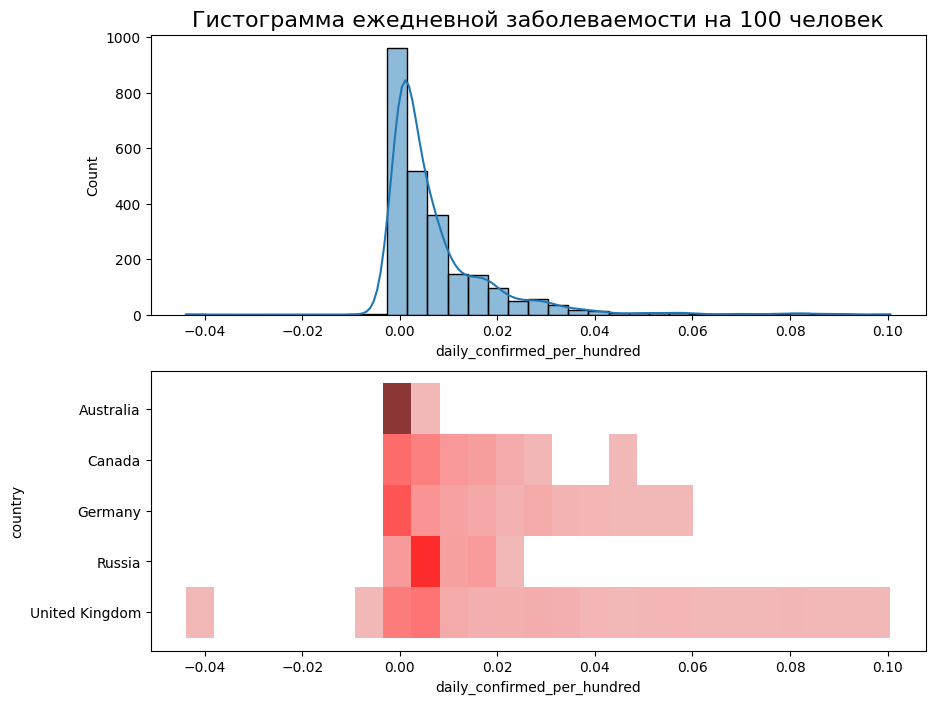

In [149]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=35,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);




# Общая гистограмма показывает, что ежедневная заболеваемость в выбранных странах не превышает 0.1 % от общего количества населения,
# причём большая часть наблюдений сосредоточена около 0. 

# Также отчётливо видны аномалии — маленькие «пеньки», где заболеваемость отрицательная.

# Гистограмма по странам показывает, какой вклад в общее распределение вносит заболеваемость в каждой из стран по отдельности. 
# Например, ясно, что пик около нуля на общей гистограмме в основном задаётся Австралией, 
# так как в ней ежедневная заболеваемость не превышала 0.005 % от общего числа населения (около 1.5 тыс. человек в день)
# и все наблюдения сосредоточены в двух интервалах. Чуть больший разброс по числу фиксируемых в день случаев имеет Россия,
# затем идут Канада, Германия и Великобритания.

# Отличительной особенностью распределения для России и Великобритании является то, 
# что для них характерен больший процент заболевших (самая тёмная отметка находится правее, чем у других стран).

# Наконец, видно, что аномальная отрицательная заболеваемость принадлежит Великобритании.
# Об аномалиях, их поиске как с помощью визуализации, так и иными методами мы ещё будем говорить в модуле по очистке данных.


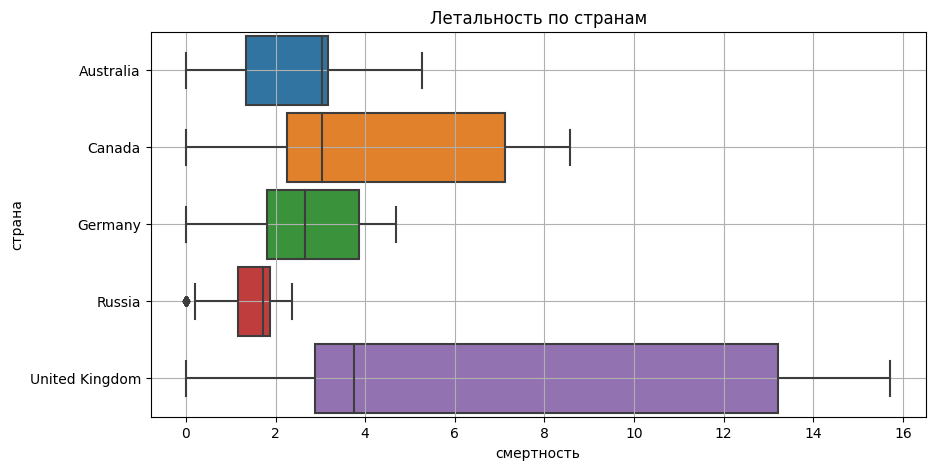

In [150]:
fig = plt.figure(figsize=(10,5))
boxplot= sns.boxplot(
    data= croped_covid_df,
    x= 'death_rate',
    y= 'country',
    orient='h',
    width=0.9
);
boxplot.set_title('Летальность по странам')
boxplot.set_xlabel('смертность')
boxplot.set_ylabel('страна')
boxplot.grid();

# Из выделенных стран наиболее стабильная во времени летальность от коронавируса — в России (ширина ящика наименьшая), 
# она же является самой низкой (наименьшая медиана). Наибольший разброс имеет процент смертей в Великобритании, 
# что объясняется вирусологами и британскими СМИ как неподготовленность страны к эпидемии в её начале, что приводило к высокой летальности. 
# Однако, судя по тому что медианное значение летальности в стране практически совпадает со всеми остальными, 
# можно сказать, что со временем обстановка стабилизировалась.

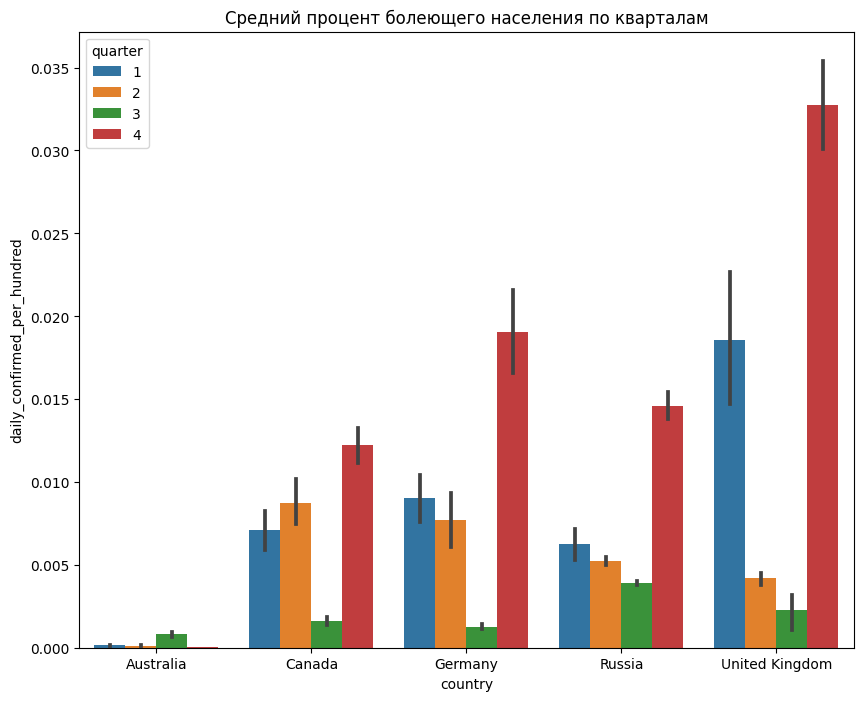

In [151]:
fig = plt.figure(figsize=(10,8))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot= sns.barplot(
    data= croped_covid_df,
    x= 'country',
    y= 'daily_confirmed_per_hundred',
    hue= 'quarter'
)
barplot.set_title('Средний процент болеющего населения по кварталам');

# Диаграмма показывает, как зависит средний ежедневный процент заболевших от страны и квартала.
# Отчётливо видно, что во всех странах (кроме Австралии), большинство людей заболевают в четвёртом квартале (октябрь, ноябрь, декабрь),
# когда иммунитет особенно ослаблен, а наименьшее число заболевших соответствует третьему кварталу (июль, август, сентябрь).


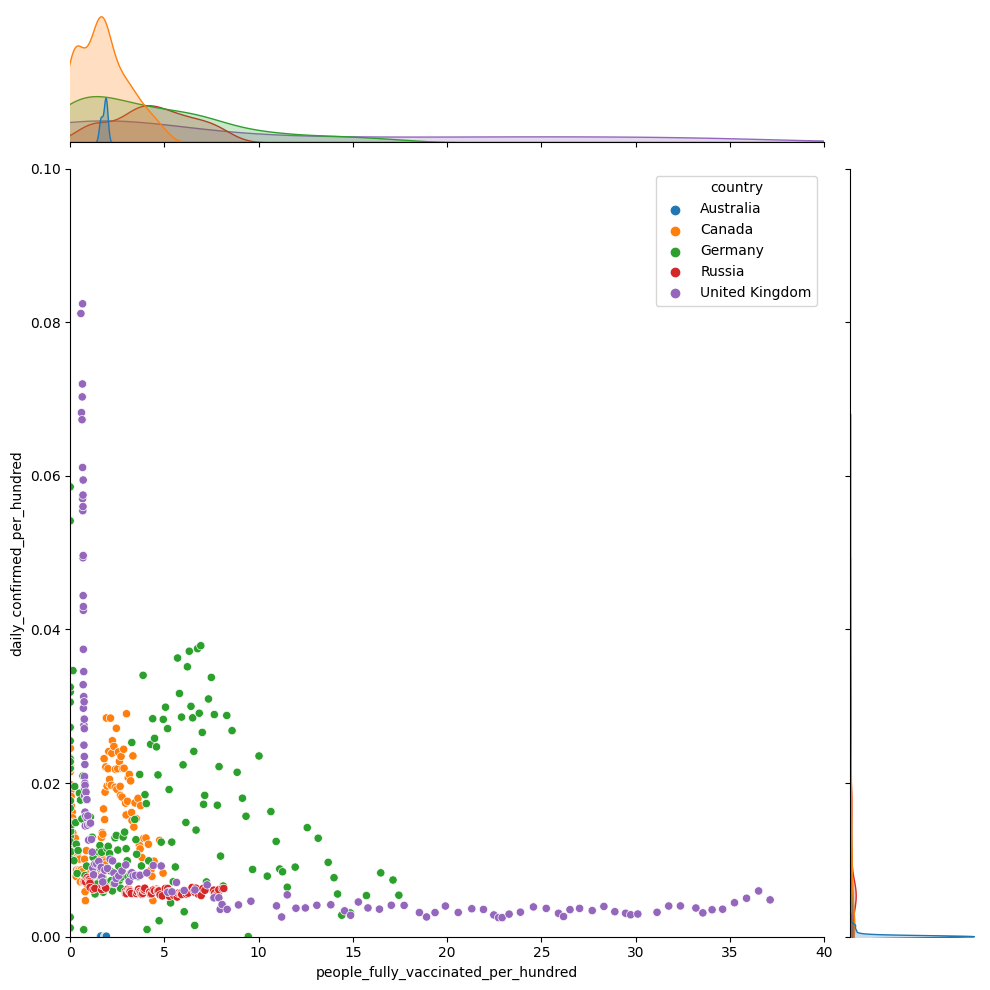

In [157]:
joinplot = sns.jointplot(
    data= croped_covid_df,
    x= 'people_fully_vaccinated_per_hundred',
    y= 'daily_confirmed_per_hundred',
    hue= 'country',
    xlim=(0, 40),
    ylim=(0,0.1),
    height=10
)

In [158]:
# Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам — страны. 
# В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране на определённую дату. 
# Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу string.
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
pivot.head()

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


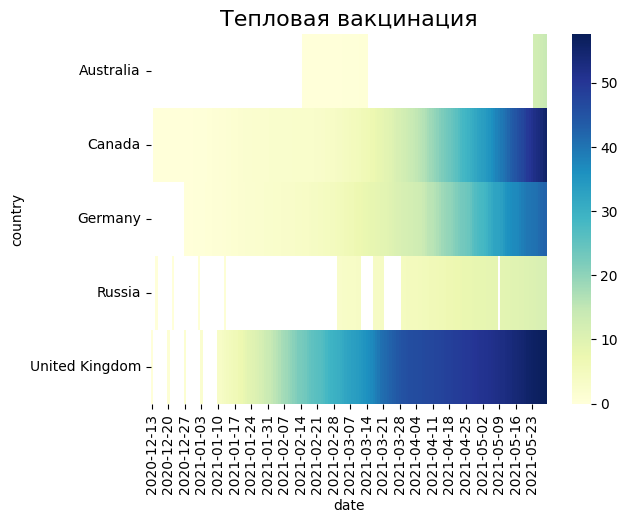

In [160]:
heatmap = sns.heatmap(data= pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая вакцинация', fontsize=16);
#

# По тепловой карте легко можно понять, в каких странах темпы вакцинации выше, а в каких — ниже. 
# Согласно легенде справа, чем ближе цвет полосы к синему, тем больше процент вакцинированных людей. 
# Чем быстрее полоса переходит от блёклого жёлтого к насыщенному синему, тем выше темп вакцинации. 
# Белые полосы обозначают отсутствие информации за данный период.

# Так, можно судить, что наиболее активно кампания по вакцинации проходила в Великобритании, 
# и на конец периода число вакцинированных первым компонентом людей в стране превысило отметку в 50 % от общего числа населения. 
# В Канаде вакцинация населения вначале проходила медленнее, 
# однако к концу периода наблюдений общий процент вакцинированных первым компонентом сравнялся с Великобританией.

# Темпы вакцинации в России и Австралии гораздо ниже: здесь число привитых на конец периода составляет около 10 % от общего числа населения.

# При этом с помощью тепловой карты мы смогли увидеть, 
# что в данных о вакцинации в России, Великобритании и Австралии содержатся пропуски,
# и мы даже можем узнать, за какие периоды, посмотрев на ось абсцисс.


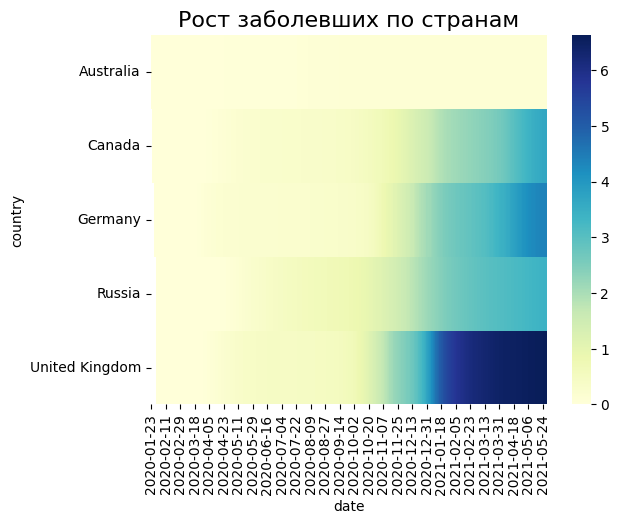

In [166]:
# Создайте новый признак confirmed_per_hundred,
# который покажет процентное отношение заболевших вирусом к общему числу населения в странах ().
# Постройте тепловую карту, которая покажет, 
# как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.
# Подсказка (1 из 1): Постройте сводную таблицу, столбцы которой — даты, строки — страны, а ячейки — процент заболевшего населения.
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100
pivot1 = croped_covid_df.pivot_table(
    values= 'confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot1.columns = pivot1.columns.astype('string')

heatmap1 = sns.heatmap(
    data= pivot1,
    cmap= 'YlGnBu'
)
heatmap1.set_title('Рост заболевших по странам', fontsize= 16);

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,...,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recovered_rate,population,daily_confirmed_per_hundred,quarter,confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN,1,0.000000
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016,1,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,1,0.000016
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004,1,0.000019
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,1,0.000019


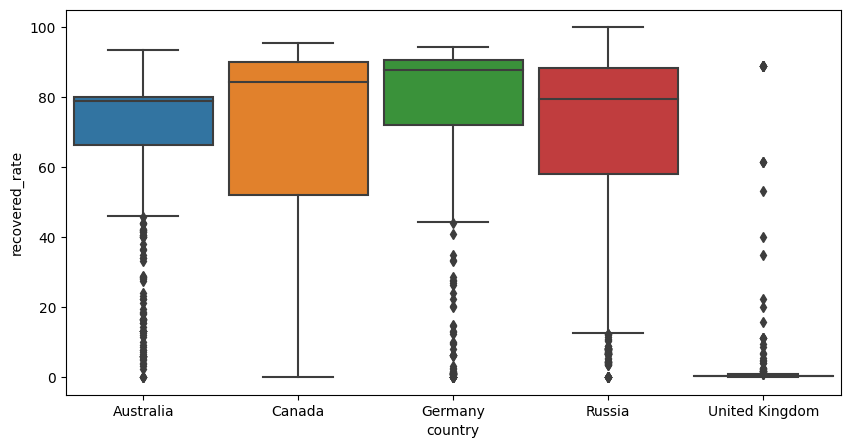

In [171]:
# Постройте коробчатую диаграмму для признака recover_rate 
# (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).

display(croped_covid_df.head())
fig = plt.figure(figsize=(10,5))
boxplot1 = sns.boxplot(
    data=croped_covid_df,
    x='country',
    y='recovered_rate',
    width=0.9,
    orient='v'
)
# A График для Великобритании имеет «сплюснутый» в нуле вид, что указывает либо на практически полное отсутствие случаев выздоровления, либо, с точки зрения здравого смысла, на неверные данные о числе выздоровевших пациентов в этой стране.
# B Наибольший разброс по проценту ежедневных выздоровлений — в Канаде. 

